In [1]:
import sklearn
from sklearn.datasets import load_breast_cancer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, classification_report
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [2]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
df = pd.DataFrame(data=cancer.data, columns = cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df['target'] = cancer.target
df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0


In [5]:
X = df.drop(['target'], axis=1)
y = df['target']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [7]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

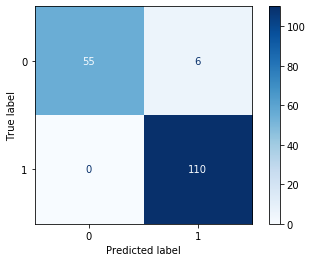

In [8]:
disp = plot_confusion_matrix(svm_model,X_test,y_test, cmap='Blues', values_format=".3g")

In [9]:
disp.confusion_matrix

array([[ 55,   6],
       [  0, 110]])

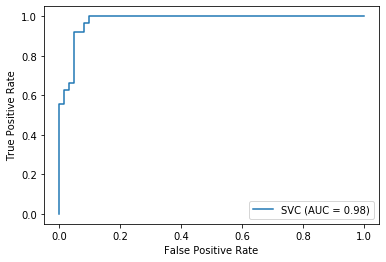

In [10]:
disp_curve = plot_roc_curve(svm_model, X_test, y_test)

In [11]:
params = {}
params['C'] = [0.1,1, 10, 100, 1000]
params['gamma'] = [1,0.1,0.01,0.001,0.0001]
params['kernel'] = ['rbf']

In [12]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [13]:
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

In [14]:
results.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
9,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.924525,1
19,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",0.917057,2
14,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.914557,3
4,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.901994,4
8,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.901994,4
24,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",0.899430,6
18,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.881835,7
13,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.881835,7
23,"{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}",0.881835,7
21,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}",0.620601,10


In [15]:
grid_predictions = grid.predict(X_test)

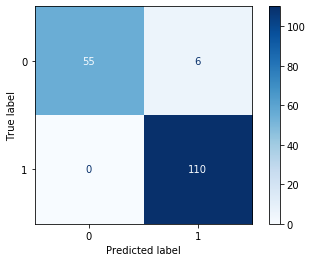

In [16]:
disp_grid = plot_confusion_matrix(grid,X_test,y_test, cmap='Blues', values_format=".3g")

In [17]:
disp_grid.confusion_matrix

array([[ 55,   6],
       [  0, 110]])

In [18]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        61
           1       0.95      1.00      0.97       110

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

